In [2]:
import sys
import os

project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)
 
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette='pastel')
plt.rcParams['figure.figsize'] = (12, 6)

CODIGO_HOSPITAL = 112102

En este cuadernillo se quieren identificar los diagósticos más relevantes productivamente y nacionlamente del HLCM.

In [46]:
# Lee el desglose de ranking nacional por diagnostico
df = pd.read_csv("../data/interim/ranking_nacional_egresos.csv", encoding="latin-1", sep=";")
df["Codigo - Diagnostico"] = df["DIAG1"] + " - " + df["Descripción"]

In [47]:
# Obtiene solamente los datos del HLCM
df_hlcm = df.query("ESTABLECIMIENTO_SALUD == @CODIGO_HOSPITAL")

## 1. Diagnósticos más relevantes del Hospital de Niños Luis Calvo Mackenna

En este apartado se quieren responder las siguientes preguntas:

1. ¿Cuáles son los **diagnósticos más relevantes productivamente** en el Hospital de Niños Luis Calvo Mackenna?
2. ¿En qué diagnósticos el HLCM tiene una mayor cantidad de Egresos que cualquier otro establecimiento
de salud Nacional? En otras palabras, ¿En qué diagnósticos el **HLCM tiene un Ranking 1 Nacional**?

Estas preguntas se quieren responder tanto para diagnósticos ambulatorios (n_int_q = 0) y 
quirúrgicos (n_int_q > 0).

In [101]:
DIAGS_MAS_RELEVANTES_QUIRURGICOS = sorted(
    df_hlcm.query("ranking_nacionales_n_egresos == 1 and n_int_q > 0 and ANO_EGRESO > 2013")
    .sort_values(["ANO_EGRESO", "n_egresos", "n_int_q"], ascending=False)
    .groupby("ANO_EGRESO")
    .head(20)["Codigo - Diagnostico"]
    .unique()
)

In [102]:
print(
    f"Hay {len(DIAGS_MAS_RELEVANTES_QUIRURGICOS)} diagnosticos quirurgicos "
    f" altamente relevantes para el pais"
)

Hay 58 diagnosticos quirurgicos  altamente relevantes para el pais


In [103]:
DIAGS_MAS_RELEVANTES_AMBULATORIOS = sorted(
    df_hlcm.query("ranking_nacionales_n_egresos == 1 and n_int_q == 0 and ANO_EGRESO > 2013")
    .sort_values(["ANO_EGRESO", "n_egresos", "n_int_q"], ascending=False)
    .groupby("ANO_EGRESO")
    .head(20)["Codigo - Diagnostico"]
    .unique()
)

In [104]:
print(
    f"Hay {len(DIAGS_MAS_RELEVANTES_AMBULATORIOS)} diagnosticos ambulatorios "
    f" altamente relevantes para el pais"
)

Hay 110 diagnosticos ambulatorios  altamente relevantes para el pais


In [105]:
resumen_camas_totales = (
    (df_hlcm.query("ANO_EGRESO != 2013").groupby("ANO_EGRESO")["dias_estada_totales"].sum()) / 365.25
) * 1.25

resumen_camas_diags_relevantes = (
    (
        df_hlcm.query(
            "ANO_EGRESO != 2013 and `Codigo - Diagnostico`.isin(@DIAGS_MAS_RELEVANTES_QUIRURGICOS)"
        )
        .groupby("ANO_EGRESO")["dias_estada_totales"]
        .sum()
    )
    / 365.25
) * 1.25

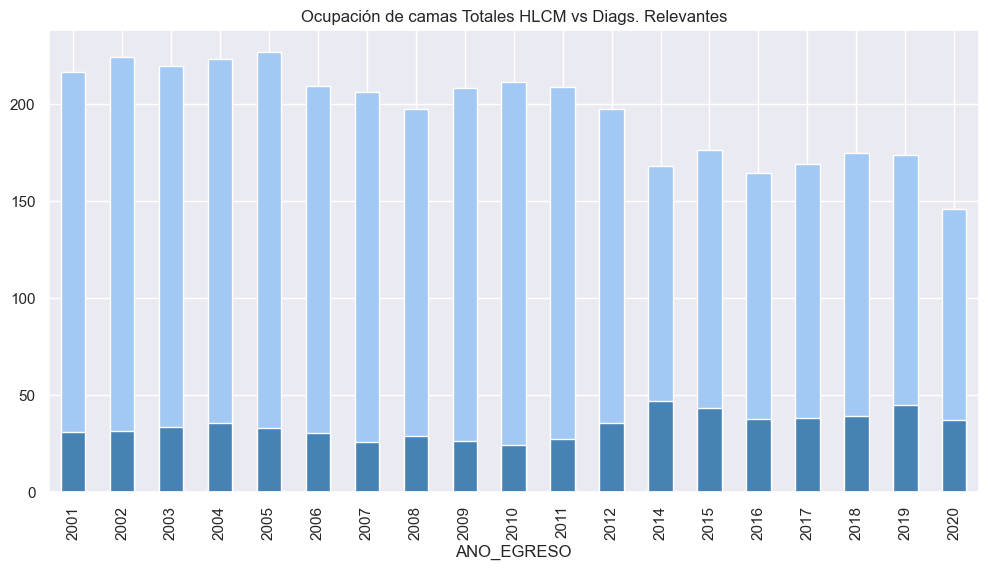

In [108]:
ax = resumen_camas_totales.plot(kind="bar")
resumen_camas_diags_relevantes.plot(kind="bar", ax=ax, color="steelblue")
plt.title("Ocupación de camas Totales HLCM vs Diags. Relevantes")
plt.show()